In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

crop_df = pd.read_csv(r'C:\Users\hanna\Fall2024\ITCS3156\Projects\crop_yield.csv')

In [2]:
crop_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [3]:
crop_df.describe(include = 'all')

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000,1000000,1000000.000000,1000000.000000
unique,4,6,6,NaN,NaN,2,2,3,NaN,NaN
top,North,Sandy,Maize,NaN,NaN,False,False,Sunny,NaN,NaN
freq,250173,167119,166824,NaN,NaN,500060,500509,333790,NaN,NaN
mean,NaN,NaN,NaN,549.981901,27.504965,NaN,NaN,NaN,104.495025,4.649472
std,NaN,NaN,NaN,259.851320,7.220608,NaN,NaN,NaN,25.953412,1.696572
min,NaN,NaN,NaN,100.000896,15.000034,NaN,NaN,NaN,60.000000,-1.147613
25%,NaN,NaN,NaN,324.891090,21.254502,NaN,NaN,NaN,82.000000,3.417637
50%,NaN,NaN,NaN,550.124061,27.507365,NaN,NaN,NaN,104.000000,4.651808
75%,NaN,NaN,NaN,774.738520,33.753267,NaN,NaN,NaN,127.000000,5.879200


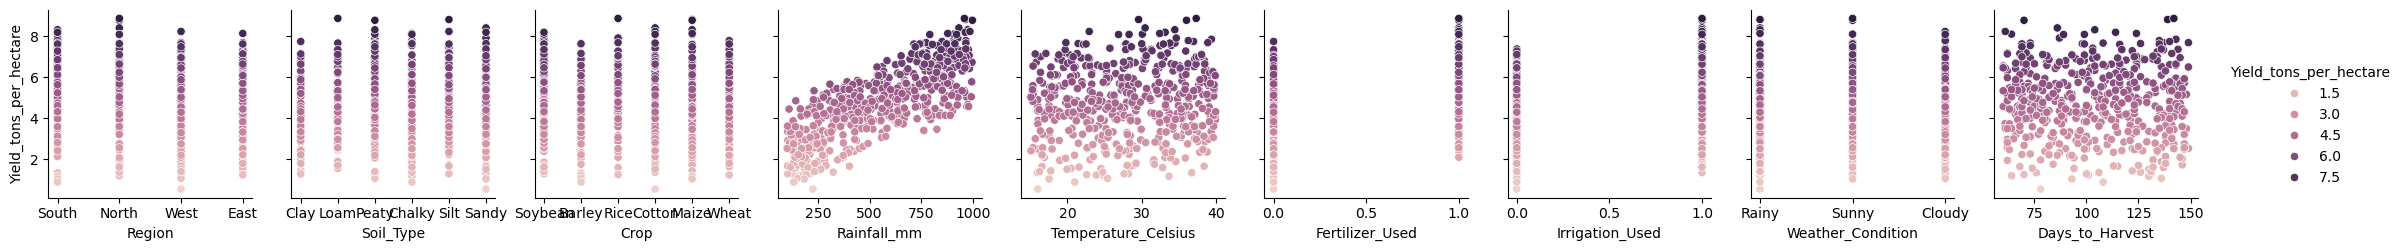

In [4]:
import seaborn as sns
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(crop_df)), size=500, replace=False)
sns.pairplot(
    data=crop_df.iloc[indices],
    y_vars='Yield_tons_per_hectare',
    x_vars=list(crop_df.drop('Yield_tons_per_hectare',axis=1).columns),
    hue="Yield_tons_per_hectare",
)
plt.show()

In [5]:
crops_ohe = crop_df
categorical_columns = ['Region','Soil_Type','Crop','Fertilizer_Used','Irrigation_Used', 'Weather_Condition']
for col in categorical_columns:
    col_ohe = pd.get_dummies(crop_df[col], prefix=col)
    crops_ohe = pd.concat((crops_ohe, col_ohe), axis=1).drop(col, axis=1)

In [6]:
crops_ohe.describe(include = 'all')

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,...,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_False,Fertilizer_Used_True,Irrigation_Used_False,Irrigation_Used_True,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000,1000000,1000000,1000000,1000000,...,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,NaN,NaN,NaN,NaN,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
freq,NaN,NaN,NaN,NaN,750301,749827,749946,749926,833221,833648,...,833208,833651,833327,500060,500060,500509,500509,667351,666439,666210
mean,549.981901,27.504965,104.495025,4.649472,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,259.851320,7.220608,25.953412,1.696572,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100.000896,15.000034,60.000000,-1.147613,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,324.891090,21.254502,82.000000,3.417637,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,550.124061,27.507365,104.000000,4.651808,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,774.738520,33.753267,127.000000,5.879200,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [8]:
from sklearn.preprocessing import StandardScaler
def get_preprocessed_data() -> Tuple[np.ndarray, ...]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst= None, None, None, None, None, None

    X = crops_ohe.drop(columns=['Yield_tons_per_hectare']).values
    y=crops_ohe['Yield_tons_per_hectare'].values
    
    X_trn,X_tst,y_trn, y_tst = train_test_split(X,y,test_size=0.2, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn,y_trn,test_size=0.2, random_state=42)

    X_trn = np.nan_to_num(X_trn, nan=0) 
    X_vld = np.nan_to_num(X_vld, nan=0) 
    X_tst = np.nan_to_num(X_tst, nan=0) 
    
    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn) 
    X_vld = scaler.transform(X_vld)      
    X_tst = scaler.transform(X_tst)

    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [9]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse

In [10]:
class Linear():
    """ The linear or identity actionvation function """
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        """ Computes the output of the linear activation function """
        # TODO 3.1
        z=z
        return z
    
    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative for the linear activation function """
        # TODO 3.2
        return np.ones_like(z)  

In [11]:
class Tanh():
    """ The tanh actionvation function """
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        """ Computes the output of the tanh activation function """
        return np.tanh(z)

    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative of the tanh activation function """        
        tanh_z = np.tanh(z)
        return 1 - tanh_z**2 

In [12]:
def init_weights(
    n_input_features: int, 
    hidden_neurons: int, 
    output_neurons: int, 
) -> Tuple[np.ndarray, ...]:
    """ Initilize the hidden and output layer parameters
        
        Args:
            n_input_features: The number of input features

            hidden_neurons: The number of hidden neurons or units to 
                use in the hidden layer.

            output_neurons: The number of output neurons to use in 
                the output layer.

        Returns:
            A tuple of NumPy arrays containing the weights and biases
            for the hidden and output layers.
    """
    W1, b1, W2, b2 = None, None, None, None
    W1 = np.random.uniform(-0.5, 0.5, (n_input_features, hidden_neurons))
    W2 = np.random.uniform(-0.5, 0.5, (hidden_neurons, output_neurons))
    
    b1 = np.ones((1, hidden_neurons))
    b2 = np.ones((1, output_neurons))
    return W1, b1, W2, b2

In [13]:
def forward(
    X: np.ndarray, 
    W1: np.ndarray, 
    b1: np.ndarray,
    W2: np.ndarray, 
    b2: np.ndarray, 
) -> Tuple[np.ndarray, ...]:
    """ Forward pass for 2 layer neural network
    
        Args:
            X: Input features
            
            W1: Hidden layer weights 
            
            b1: Hidden layer baises

            W2: Output layer weights 
            
            b2: Output layer baises

        Returns:
            A tuple of NumPy arrays containing the linear combination and 
            acitvation outputs for each layer. These are needed to compute 
            the backward pass.
    """
    Z1, A1, Z2, A2 = None, None, None, None
    Z1 = np.dot(X, W1) + b1 
    A1 = Tanh.activation(Z1) 
    Z2 = np.dot(A1, W2) + b2 
    A2 = Linear.activation(Z2)
    return Z1, A1, Z2, A2

In [14]:
def output_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the output layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the output layer weights and biases.
    """
    delta_mse_A2 = A2 - y
    delta_A2_Z2 = Linear.derivative(Z2)
    delta_Z2_W2 = A1
    delta_mse_Z2 = delta_mse_A2 * delta_A2_Z2
    delta_Z2_A1 = W2
    delta_A1_Z1 = Tanh.derivative(Z1)
    delta_Z1_b2 = np.ones([len(y), 1])
    delta_mse_W2 = delta_Z2_W2.T  @ delta_mse_Z2 
    W2_avg_grad = delta_mse_W2 / len(y) 

    delta_Z1_b2 = np.ones([len(y), 1])
    delta_mse_A1 = (delta_mse_A2 * delta_A2_Z2) @ delta_Z2_A1.T
    delta_mse_b2 =  delta_Z1_b2.T @ (delta_mse_A1 * delta_A1_Z1)

    b2_avg_grad = np.sum(delta_mse_Z2, axis=0, keepdims=True) / len(y) 

    return W2_avg_grad, b2_avg_grad

In [15]:
def hidden_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the hidden layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the hidden layer weights and biases.
    """
    delta_mse_A2 = A2 - y
    delta_A2_Z2 = Linear.derivative(Z2)
    delta_Z2_W1 = A1
    delta_mse_Z2 = delta_mse_A2 * delta_A2_Z2
    delta_mse_A1 = np.dot(delta_mse_Z2, W2.T)
    delta_A1_Z1 = Tanh.derivative(Z1)
    delta_Z1_b1 = np.ones([len(y), 1])
    delta_mse_Z1 = delta_mse_A1 * delta_A1_Z1    

    delta_mse_W1 = X.T @ delta_mse_Z1
    W1_avg_grad = delta_mse_W1 / len(y)
    b1_avg_grad = np.sum(delta_mse_Z1, axis=0, keepdims=True) / len(y)

    return W1_avg_grad, b1_avg_grad

In [16]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [17]:
class NeuralNetwork():
    def __init__(self,
        hidden_neurons: int,
        output_neurons: int,
        alpha: float, 
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):
        """ A two layer neural network using SGD
            
            Attributes:
                hidden_neurons: Number of hidden units/neurons.
                
                output_neurons: Number of output neuorns
                
                alpha: learning rate or step size.
                
                batch_size: Size of mini-batches for mini-batch gradient
                    descent.
                
                epochs: Number of epochs to run for mini-batch
                    gradient descent.
                    
                seed: Seed to be used for NumPy's RandomState class
                    or universal seed np.random.seed() function.
    
                W1: Hidden layer weights with shape (inputs, neurons)
                
                b1: Hidden layer baises with shape (1, neurons)
                
                W2: Output layer weights with shape (inputs, neurons)
                
                b2: Output layer baises with shape (1, neurons)
    
                trn_error: Stores the training error for each epoch.
    
                vld_error: Stores the validation error for each epoch.
        """
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.batch_size = batch_size
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed
        
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None
        self.trn_error = None
        self.vld_error = None

    def fit(
        self,
        X: np.ndarray, 
        y: np.ndarray,
        X_vld: np.ndarray = None, 
        y_vld:np.ndarray = None,
    ): 
        """ Trains a basic two layer neural network using SGD
        
            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector

                X_vld: Validation data given as a 2D matrix. Used 
                    to compute the validation RMSE for each epoch.

                y_vld: Validation labels given as a 2D matrix. Used 
                    to compute the validation RMSE for each epoch.
                
            Returns:
                The class's own object reference. 
        """
        np.random.seed(self.seed)
        self.trn_error = []
        self.vld_error = []
        
        n_input_features = X.shape[1]
        self.W1, self.b1, self.W2, self.b2 = init_weights(n_input_features, self.hidden_neurons, self.output_neurons)
    
        for epoch in range(self.epochs):
            batches = get_batches(len(X), self.batch_size)
            for b in batches:
                X_batch, y_batch = X[b], y[b]
                Z1, A1, Z2, A2 = forward(X_batch, self.W1, self.b1, self.W2, self.b2)
    
                W2_grad, b2_grad = output_layer_grads(X_batch, y_batch, self.W1, Z1, A1, self.W2, Z2, A2)
                W1_grad, b1_grad = hidden_layer_grads(X_batch, y_batch, self.W1, Z1, A1, self.W2, Z2, A2)
    
                self.W1 -= self.alpha * W1_grad
                self.b1 -= self.alpha * b1_grad
                self.W2 -= self.alpha * W2_grad
                self.b2 -= self.alpha * b2_grad
            trn_loss = rmse(y_batch, A2)  
            self.trn_error.append(trn_loss)
            if X_vld is not None and y_vld is not None:
                _, _, _, A2_vld = forward(X_vld, self.W1, self.b1, self.W2, self.b2)
                vld_loss = rmse(y_vld, A2_vld)
                self.vld_error.append(vld_loss)
        print(f"X_trn shape: {X.shape}, y_trn shape: {y.shape}") 
        print(f"X_vld shape: {X_vld.shape}, y_vld shape: {y_vld.shape}")
        return self
    
    def predict(self, X: np.ndarray):
        """ Make predictions using forward pass.

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        _,_,_,A2 = forward(X, self.W1, self.b1, self.W2, self.b2)
        A2 = A2.reshape(-1, 1)

        return A2

X_trn shape: (640000, 26), y_trn shape: (640000, 1)
X_vld shape: (160000, 26), y_vld shape: (160000, 1)
Train rMSE: 0.6457844201186271
Validation rMSE: 0.6471570659161587
Test rMSE: 0.646129959971854
0.8551696447884346


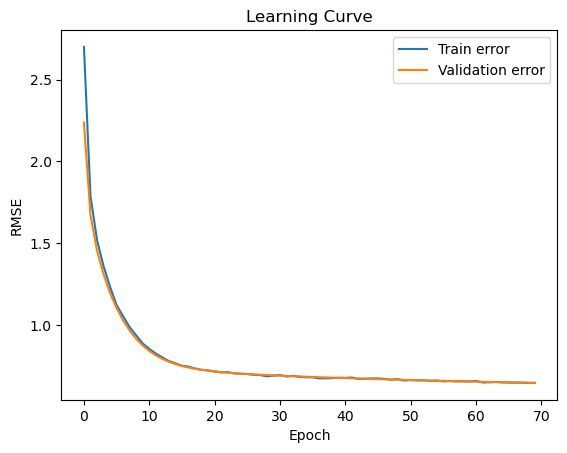

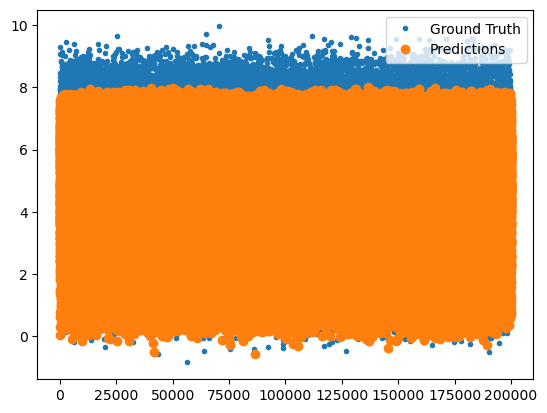

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()
nn = NeuralNetwork(
        hidden_neurons=25,
        output_neurons=1,
        batch_size=300000,
        alpha=0.05,
        epochs=70,
        seed=0,
    )
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
y_hat_trn = nn.predict(X_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)
print(f"Train rMSE: {trn_rmse_score}")
    
y_hat_vld = nn.predict(X_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)
print(f"Validation rMSE: {vld_rmse_score}")

y_hat_tst = nn.predict(X_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)
print(f"Test rMSE: {tst_rmse_score}")

r2 = r2_score(y_tst, y_hat_tst)
adjusted_r2 = 1 - (1 - r2) * ((len(y_tst) - 1) / (len(y_tst) - X_tst.shape[1] - 1))
print(adjusted_r2)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch") 
plt.legend()
plt.show()

plt.plot(y_tst, '.', label='Ground Truth')
plt.plot(nn.predict(X_tst), 'o', label='Predictions')
plt.legend()
plt.show()